In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pywt
from tqdm import tqdm_notebook

from mpl_toolkits import mplot3d
from scipy.stats import uniform
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rv = uniform()

## Завдання А

### Вейвлет Хаара

In [4]:
def base_haar_wavelet(x):
    return -np.sign(x - 0.5) * np.heaviside(x, 1) * np.heaviside(1 - x, 1)

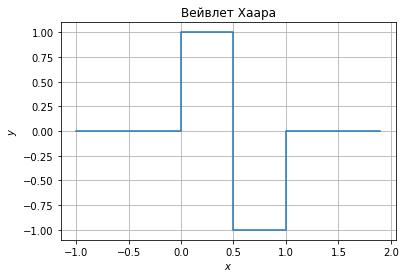

In [5]:
x = np.arange(-1, 2 , 0.1)
y = list(map(base_haar_wavelet, x))
plt.grid(True)
plt.title('Вейвлет Хаара')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.step(x, y);

### Вейвлет Шенона

In [6]:
def sinc(x):
    return np.sin(np.pi * x) / (np.pi * x)

In [7]:
def base_shannon_wavelet(x):
    return sinc(x/2) * np.cos(3*np.pi*x/2)

In [8]:
x = np.arange(-10, 10 , 0.1)
y = list(map(base_shannon_wavelet, x))

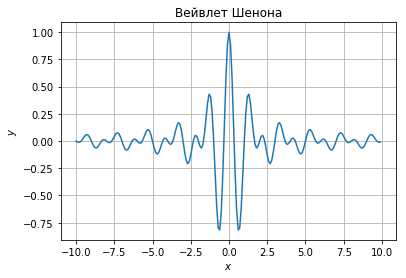

In [9]:
plt.grid(True)
plt.title('Вейвлет Шенона')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x, y);

### Вейвлет Гаусса

In [10]:
def base_gaussian_wavelet(x):
    return np.exp((-x**2)/2)

In [11]:
x = np.arange(-5, 5 , 0.1)
y = list(map(base_gaussian_wavelet, x))

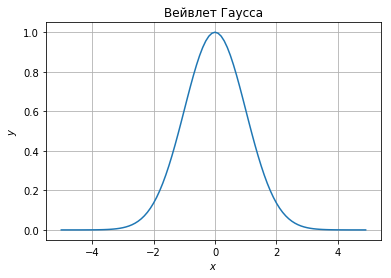

In [12]:
plt.grid(True)
plt.title('Вейвлет Гаусса')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x, y);

## Завдання Б

In [13]:
student_num = 21
group_num = 51

M = student_num
NG = group_num

n = int(NG / 5)
N = 2 ** n
M1 = N

In [14]:
i = np.arange(N)
s1 = 2 * rv.rvs(N) + NG * np.cos(2 * M * np.pi * i / N) * (1 + 0.1 * rv.rvs(N)) + 17 * np.cos(4 * M * np.pi * i / N + rv.rvs(N)) + 3 * np.cos(7 * M * np.pi * i / N) * (rv.rvs(N) + NG)

In [15]:
def f2(j, k, x, g1):
    return np.power(2, j / 2.0) * g1((2 ** j) * x - k)

def W(l, j, g1):
    i = np.arange(N)
    return np.sum(s1 * f2(l, j, i, g1))

def d(W, g1):
    total = 0
    i = np.arange(N)
    for l in np.arange(M + 1):
        for j in np.arange(M1 + 1):
            total += np.divide(
                np.multiply(W(l, j, g1), f2(l, j, i, g1)), (2 ** (2 * l)))
    
    return total

def plot_restore(g1):
    fig, ax = plt.subplots(2, 1, figsize=(20, 12))

    restored = d(W, g1)
    ax[0].plot(s1, c="b", label="Початковий")
    ax[0].plot(restored, c="r", label="Відновлений")
    ax[0].legend()
    ax[0].set_title("Сигнали")

    ax[1].plot(s1 - restored, c="y", label="Різниця")
    ax[1].legend()
    ax[1].set_title("Різниця")
    plt.plot()

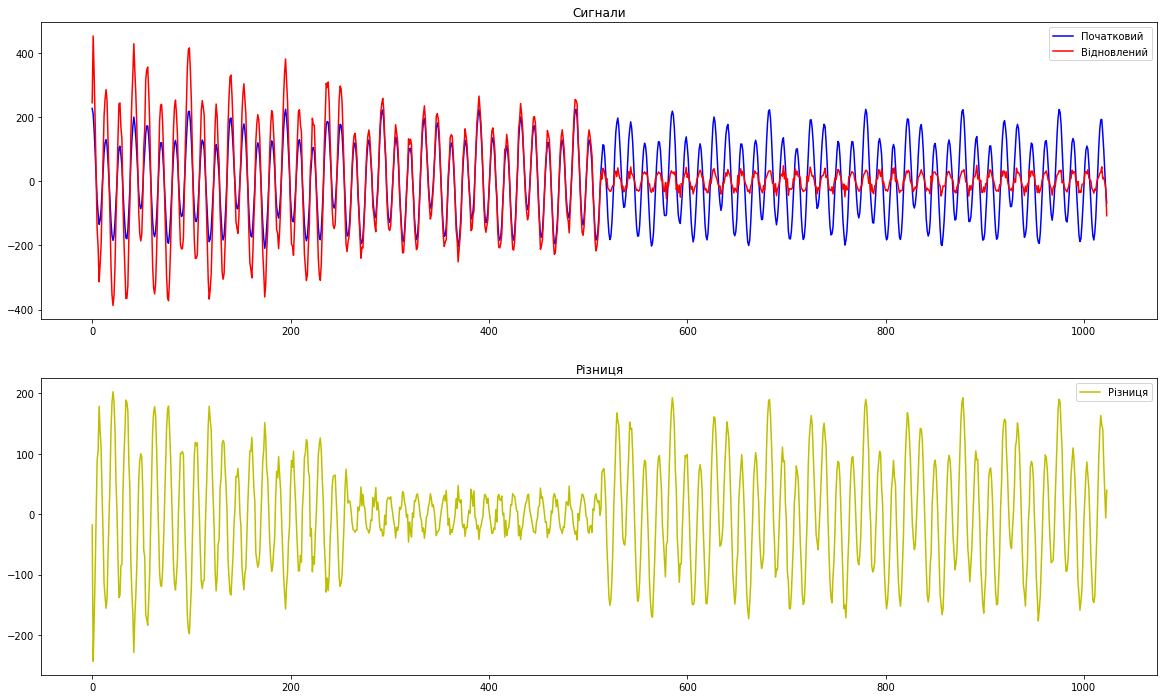

In [16]:
plot_restore(base_haar_wavelet)

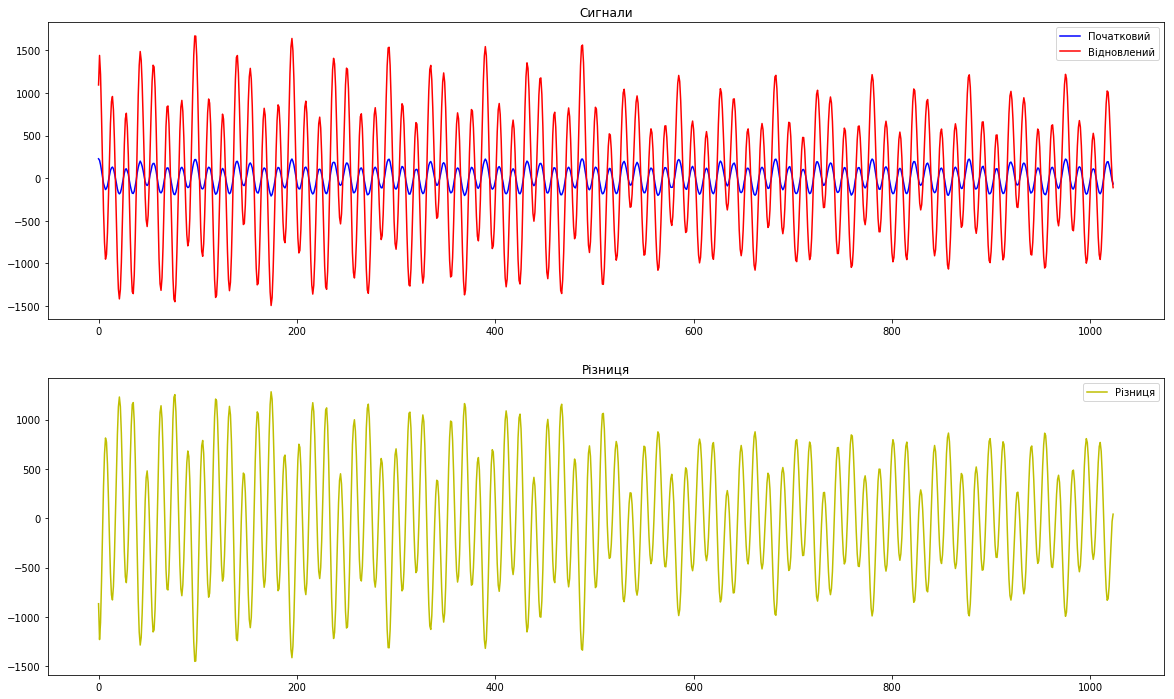

In [17]:
plot_restore(base_gaussian_wavelet)

### Графік для вейвлету Хаара

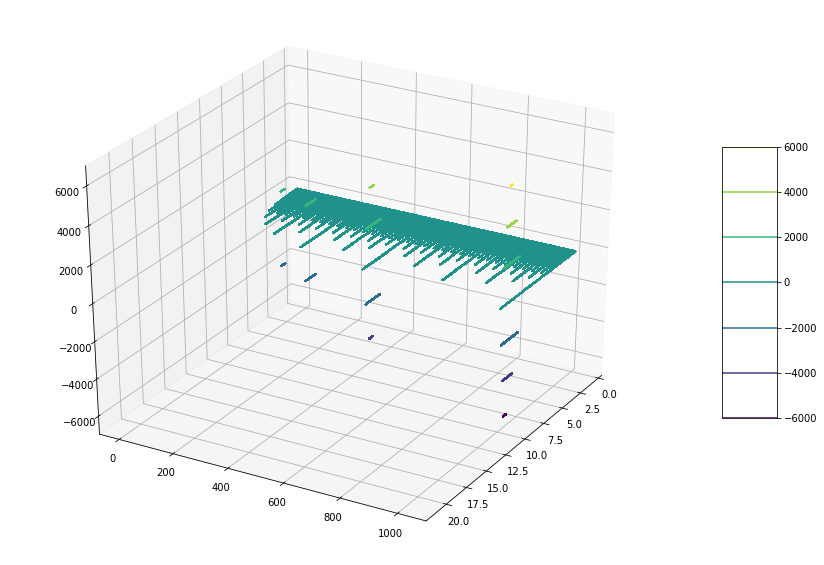

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')
g1 = base_haar_wavelet

l = np.arange(1, M+1)
j = np.arange(1, M1+1)

X, Y = np.meshgrid(l, j)
Z = np.array([
    W(l, j, g1) for l,j in zip(np.ravel(X), np.ravel(Y))
]).reshape(X.shape)

# Plot the surface.
surf = ax.contour3D(X, Y, Z, cmap=cm.viridis,
                    linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(30, 30)

plt.show()

### Графік для гауссівського вейвлету

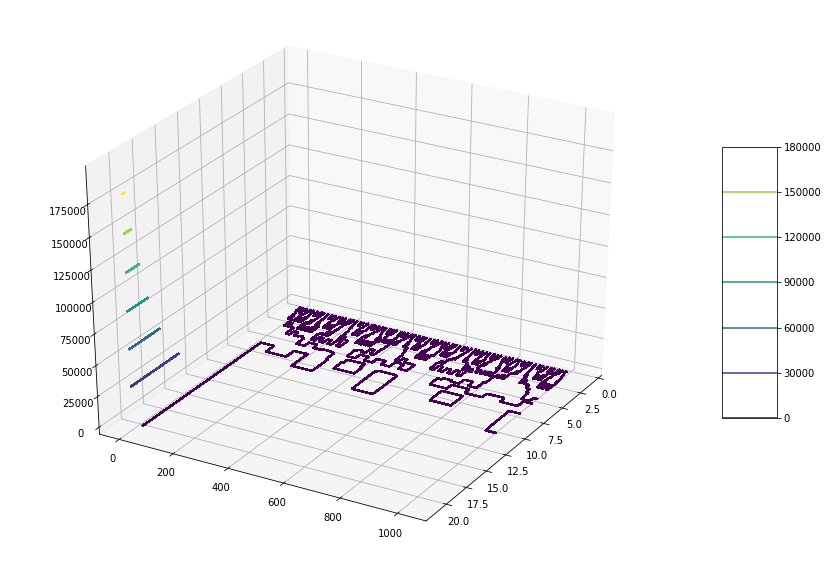

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')
g1 = base_gaussian_wavelet

l = np.arange(1, M+1)
j = np.arange(1, M1+1)

X, Y = np.meshgrid(l, j)
Z = np.array([W(l, j, g1) for l,j in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

# Plot the surface.
surf = ax.contour3D(X, Y, Z, cmap=cm.viridis,
                    linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(30, 30)

plt.show()